In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Downloading Dataset
#### Downloaded the Cryptocurrency data of bitcoin and several altcoins to understand and verify the relationship between them

In [2]:
crypto_df = pd.read_csv('consolidated_coin_data.csv')

In [3]:
crypto_df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"


# Data Preparation and Cleaning
#### Understanding and exploring the dataset after loading the dataset into a data frame in pandas

In [4]:
# exploring the rows and columns of the dataset
crypto_df.shape

(28944, 8)

In [5]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [6]:
crypto_df['Currency'].unique()

### There are 12 unique cryptocurrencies in the dataset:
# Tezos
# binance-coin
# eos
# bitcoin
# tether
# xrp
# bitcoin-cash
# stellar
# litecoin
# ethereum
# cardano
# bitcoin-sv

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

In [7]:
## need to remove data for 0 volume value in 2013 only
crypto_df['Date'] = pd.to_datetime(crypto_df.Date)

In [8]:
crypto_df['Date']

0       2019-12-04
1       2019-12-03
2       2019-12-02
3       2019-12-01
4       2019-11-30
           ...    
28939   2013-05-02
28940   2013-05-01
28941   2013-04-30
28942   2013-04-29
28943   2013-04-28
Name: Date, Length: 28944, dtype: datetime64[ns]

In [9]:
crypto_df['year'] = pd.DatetimeIndex(crypto_df.Date).year
crypto_df['month'] = pd.DatetimeIndex(crypto_df.Date).month
crypto_df['day'] = pd.DatetimeIndex(crypto_df.Date).day
crypto_df['weekday'] = pd.DatetimeIndex(crypto_df.Date).weekday

In [10]:
# Year, month and day added to ease the removal of 2013 values of cryptos as data 
# for 2013 is incomplete and therefore it miay hamper analysis
crypto_df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,"46,048,752","824,588,509",2019,12,4,2
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,"41,462,224","853,213,342",2019,12,3,1
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,"27,574,097","817,872,179",2019,12,2,0
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,"24,127,567","828,296,390",2019,12,1,6
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,"28,706,667","879,181,680",2019,11,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0,"58,287,979",2013,5,2,3
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0,"65,604,596",2013,5,1,2
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0,"74,020,918",2013,4,30,1
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0,"75,388,964",2013,4,29,0


In [11]:
crypto_drop = crypto_df.drop(crypto_df[crypto_df['year']== 2013].index)
crypto_drop

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,"46,048,752","824,588,509",2019,12,4,2
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,"41,462,224","853,213,342",2019,12,3,1
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,"27,574,097","817,872,179",2019,12,2,0
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,"24,127,567","828,296,390",2019,12,1,6
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,"28,706,667","879,181,680",2019,11,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28691,bitcoin-sv,2014-01-05,25.04,28.00,24.80,26.83,"29,995,000","659,901,745",2014,1,5,6
28692,bitcoin-sv,2014-01-04,24.81,25.61,24.18,25.11,"12,141,900","616,747,356",2014,1,4,5
28693,bitcoin-sv,2014-01-03,25.67,25.93,23.99,24.82,"21,122,000","608,792,287",2014,1,3,4
28694,bitcoin-sv,2014-01-02,24.70,26.59,24.28,25.76,"24,848,700","631,135,532",2014,1,2,3


In [12]:
crypto_drop.dtypes

Currency              object
Date          datetime64[ns]
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Market Cap            object
year                   int64
month                  int64
day                    int64
weekday                int64
dtype: object

In [13]:
crypto_drop['Open'] = crypto_drop['Open'].str.replace(',','').astype(float)
crypto_drop['Low'] = crypto_drop['Low'].str.replace(',','').astype(float)
crypto_drop['High'] = crypto_drop['High'].str.replace(',','').astype(float)
crypto_drop['Close'] = crypto_drop['Close'].str.replace(',','').astype(float)
crypto_drop['Volume'] = crypto_drop['Volume'].str.replace(',','').astype(float)
crypto_drop['Market Cap'] = crypto_drop['Market Cap'].str.replace(',','').astype(float)

In [14]:
crypto_drop.dtypes

Currency              object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
year                   int64
month                  int64
day                    int64
weekday                int64
dtype: object

In [15]:
crypto_drop

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,2019,12,4,2
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,2019,12,3,1
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,2019,12,2,0
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,2019,12,1,6
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,2019,11,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28691,bitcoin-sv,2014-01-05,25.04,28.00,24.80,26.83,29995000.0,659901745.0,2014,1,5,6
28692,bitcoin-sv,2014-01-04,24.81,25.61,24.18,25.11,12141900.0,616747356.0,2014,1,4,5
28693,bitcoin-sv,2014-01-03,25.67,25.93,23.99,24.82,21122000.0,608792287.0,2014,1,3,4
28694,bitcoin-sv,2014-01-02,24.70,26.59,24.28,25.76,24848700.0,631135532.0,2014,1,2,3


# Q1. When was the highest volume traded day for each cryptocurrency?


In [16]:
### It is clear that the highest traded volumes of each currency were between the year 2017 - 2019
### During 2017, there was an unprecendented boom in most cryptocurrencies.
max_volume_traded = crypto_drop.sort_values('Volume', ascending=False).groupby(['Currency'])
max_volume_traded.first()

,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
Currency,,,,,,,,,,,
binance-coin,2017-06-17,36.180000,49.300000,36.180000,47.650000,1.730780e+09,2.458295e+09,2017,6,17,5
bitcoin,2019-06-26,11778.580000,13796.490000,11755.600000,13016.230000,4.510573e+10,2.314621e+11,2019,6,26,2
bitcoin-cash,2017-12-20,2825.030000,4355.620000,2825.030000,3923.070000,1.188960e+10,6.617106e+10,2017,12,20,2
bitcoin-sv,2017-06-17,36.180000,49.300000,36.180000,47.650000,1.730780e+09,2.458295e+09,2017,6,17,5
cardano,2018-01-17,0.624123,0.678517,0.440620,0.629102,1.713770e+09,1.631077e+10,2018,1,17,2
eos,2019-04-03,5.030000,5.870000,4.990000,5.220000,5.394932e+09,4.734549e+09,2019,4,3,2
ethereum,2019-05-16,246.940000,275.390000,245.800000,264.010000,1.866147e+10,2.801096e+10,2019,5,16,3
litecoin,2017-12-12,212.460000,341.720000,209.680000,316.160000,6.961680e+09,1.715975e+10,2017,12,12,1
stellar,2018-01-03,0.562720,0.919994,0.562572,0.896227,1.513270e+09,1.602204e+10,2018,1,3,2


Currency
binance-coin    AxesSubplot(0.125,0.125;0.775x0.755)
bitcoin         AxesSubplot(0.125,0.125;0.775x0.755)
bitcoin-cash    AxesSubplot(0.125,0.125;0.775x0.755)
bitcoin-sv      AxesSubplot(0.125,0.125;0.775x0.755)
cardano         AxesSubplot(0.125,0.125;0.775x0.755)
eos             AxesSubplot(0.125,0.125;0.775x0.755)
ethereum        AxesSubplot(0.125,0.125;0.775x0.755)
litecoin        AxesSubplot(0.125,0.125;0.775x0.755)
stellar         AxesSubplot(0.125,0.125;0.775x0.755)
tether          AxesSubplot(0.125,0.125;0.775x0.755)
tezos           AxesSubplot(0.125,0.125;0.775x0.755)
xrp             AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

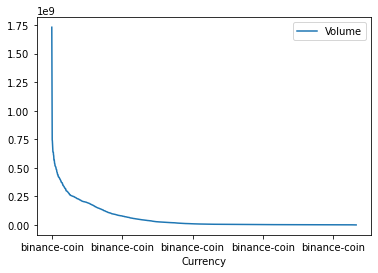

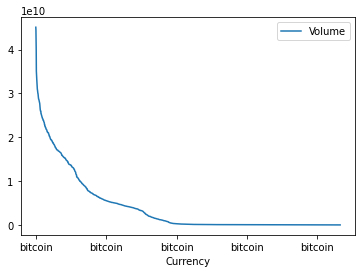

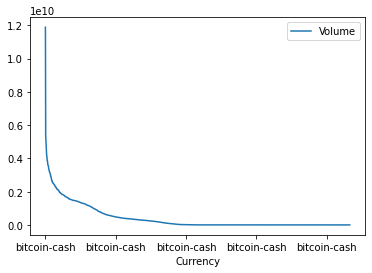

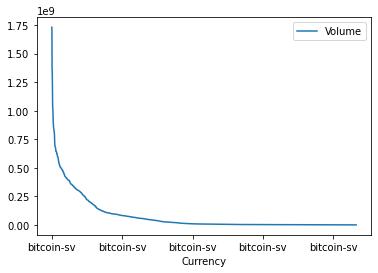

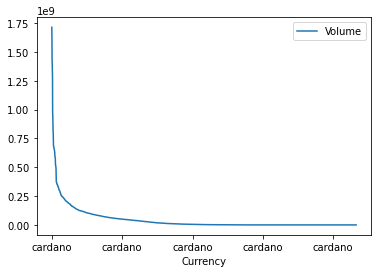

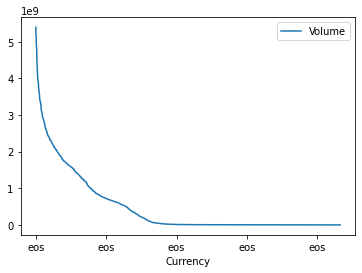

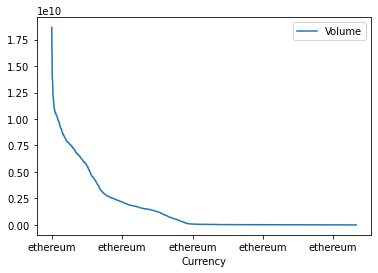

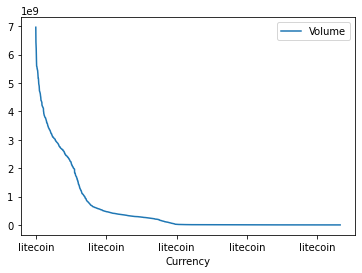

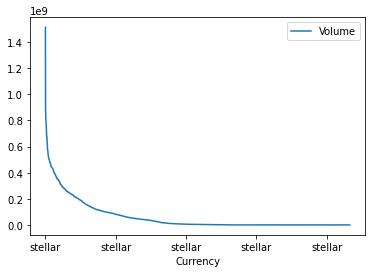

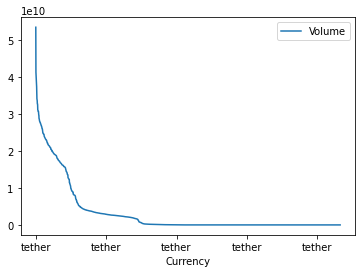

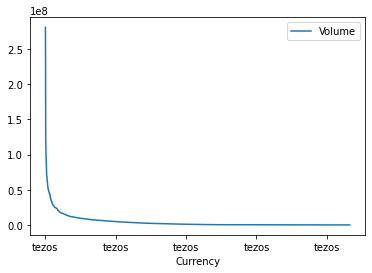

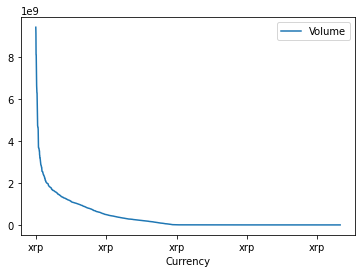

In [17]:
max_volume_traded.plot.line(x = 'Currency', y = 'Volume')

In [18]:
crypto_drop

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,2019,12,4,2
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,2019,12,3,1
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,2019,12,2,0
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,2019,12,1,6
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,2019,11,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28691,bitcoin-sv,2014-01-05,25.04,28.00,24.80,26.83,29995000.0,659901745.0,2014,1,5,6
28692,bitcoin-sv,2014-01-04,24.81,25.61,24.18,25.11,12141900.0,616747356.0,2014,1,4,5
28693,bitcoin-sv,2014-01-03,25.67,25.93,23.99,24.82,21122000.0,608792287.0,2014,1,3,4
28694,bitcoin-sv,2014-01-02,24.70,26.59,24.28,25.76,24848700.0,631135532.0,2014,1,2,3


# Q2. What is the correlation between Volume and Market Cap

In [52]:
crypto_corr = crypto_drop.groupby('Currency')[['Volume','Market Cap']].corr().unstack().iloc[:,1]
crypto_corr

### It is clear that with every unit increase in Volume, the market cap for bitcoin increases the most
###It is clear that with every unit increase in Volume, the market cap for tezos increases the most

Currency
binance-coin    0.792714
bitcoin         0.801000
bitcoin-cash    0.554661
bitcoin-sv      0.784666
cardano         0.730171
eos             0.669806
ethereum        0.407171
litecoin        0.552323
stellar         0.508136
tether          0.813162
tezos           0.326215
xrp             0.699065
Name: (Volume, Market Cap), dtype: float64

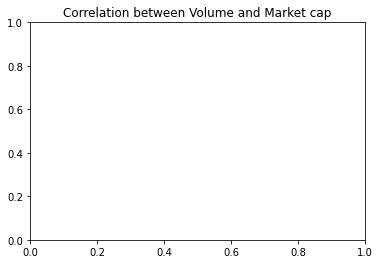

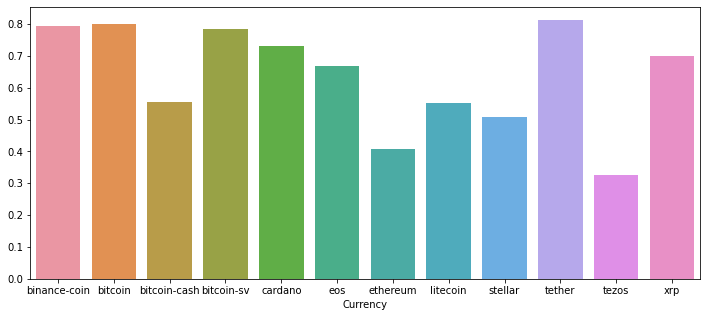

In [53]:
plt.title('Correlation between Volume and Market cap')
plt.figure(figsize=(12,5))
sns.barplot(x = crypto_corr.index, y = crypto_corr.values);

# Q3. What day of the week is best to buy?

In [21]:
crypto_drop

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,2019,12,4,2
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,2019,12,3,1
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,2019,12,2,0
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,2019,12,1,6
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,2019,11,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28691,bitcoin-sv,2014-01-05,25.04,28.00,24.80,26.83,29995000.0,659901745.0,2014,1,5,6
28692,bitcoin-sv,2014-01-04,24.81,25.61,24.18,25.11,12141900.0,616747356.0,2014,1,4,5
28693,bitcoin-sv,2014-01-03,25.67,25.93,23.99,24.82,21122000.0,608792287.0,2014,1,3,4
28694,bitcoin-sv,2014-01-02,24.70,26.59,24.28,25.76,24848700.0,631135532.0,2014,1,2,3


### The best day to buy would be the day at which the 'Open' of the currency is the lowest
### The best day to sell would be the day at which the 'Close' of the currency is the lowest

In [24]:
crypto_buy = crypto_drop.sort_values('Open', ascending=True).groupby(['Currency'])
crypto_buy_df = crypto_buy.first().reset_index()
crypto_buy_df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,binance-coin,2017-08-02,0.099721,0.101211,0.097361,0.100452,256793.0,1.004520e+07,2017,8,2,2
1,bitcoin,2015-01-15,176.900000,229.070000,176.900000,209.840000,81773504.0,2.880801e+09,2015,1,15,3
2,bitcoin-cash,2014-07-07,0.002809,0.003082,0.002802,0.003082,191510.0,2.409630e+07,2014,7,7,0
3,bitcoin-sv,2017-08-02,0.099721,0.101211,0.097361,0.100452,256793.0,1.004520e+07,2017,8,2,2
4,cardano,2014-11-19,0.001352,0.001583,0.001348,0.001548,16849.1,5.470937e+06,2014,11,19,2
5,eos,2017-10-24,0.492790,0.531023,0.482726,0.514935,7089410.0,2.191486e+08,2017,10,24,1
6,ethereum,2015-10-21,0.431589,0.482988,0.420897,0.447329,609085.0,3.315083e+07,2015,10,21,2
7,litecoin,2015-01-15,1.150000,1.380000,1.150000,1.280000,3487080.0,4.568060e+07,2015,1,15,3
8,stellar,2014-11-19,0.001352,0.001583,0.001348,0.001548,16849.1,5.470937e+06,2014,11,19,2
9,tether,2014-07-07,0.002809,0.003082,0.002802,0.003082,191510.0,2.409630e+07,2014,7,7,0


#### From the graph below, we can see that the 2nd day of the week was best buy to most of the currencies as they were at their lowest Open days

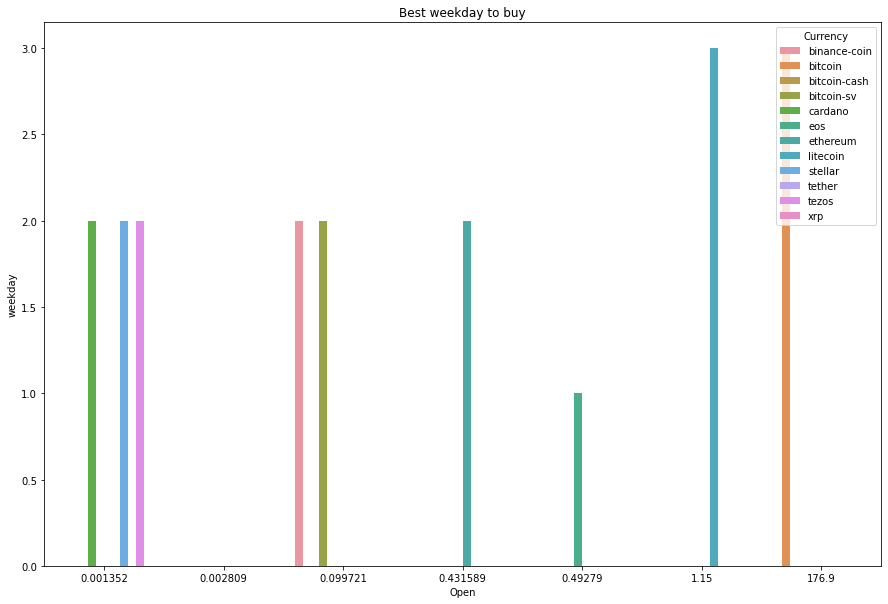

In [39]:
plt.figure(figsize=(15,10))
plt.title('Best weekday to buy')
sns.barplot(x = crypto_buy_df.Open, y = crypto_buy_df.weekday, hue = crypto_buy_df.Currency);

# Q4. What day of the week is best to sell?

In [44]:
crypto_sell = crypto_drop.sort_values('Close', ascending=False).groupby(['Currency'])
crypto_sell_df = crypto_sell.first().reset_index()
crypto_sell_df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,year,month,day,weekday
0,binance-coin,2017-06-19,46.16,53.55,44.99,50.32,1.342360e+09,2.598038e+09,2017,6,19,0
1,bitcoin,2017-12-16,17760.30,19716.70,17515.30,19497.40,1.274060e+10,3.265025e+11,2017,12,16,5
2,bitcoin-cash,2017-12-20,2825.03,4355.62,2825.03,3923.07,1.188960e+10,6.617106e+10,2017,12,20,2
3,bitcoin-sv,2019-06-22,222.49,255.88,222.28,238.34,7.901577e+08,4.254524e+09,2019,6,22,5
4,cardano,2014-01-06,26.91,32.06,26.52,29.22,5.525800e+07,7.195585e+08,2014,1,6,0
5,eos,2017-06-19,46.16,53.55,44.99,50.32,1.342360e+09,2.598038e+09,2017,6,19,0
6,ethereum,2018-01-13,1270.47,1432.88,1270.47,1396.42,5.746760e+09,1.354007e+11,2018,1,13,5
7,litecoin,2017-12-18,318.95,360.93,302.00,358.34,1.966600e+09,1.948262e+10,2017,12,18,0
8,stellar,2014-01-06,26.91,32.06,26.52,29.22,5.525800e+07,7.195585e+08,2014,1,6,0
9,tether,2015-02-26,1.21,1.21,1.19,1.21,5.960000e+00,3.033640e+05,2015,2,26,3


#### From the graph below, we can see that the 0th day of the week was best sell to most of the currencies as they were at their highest close days

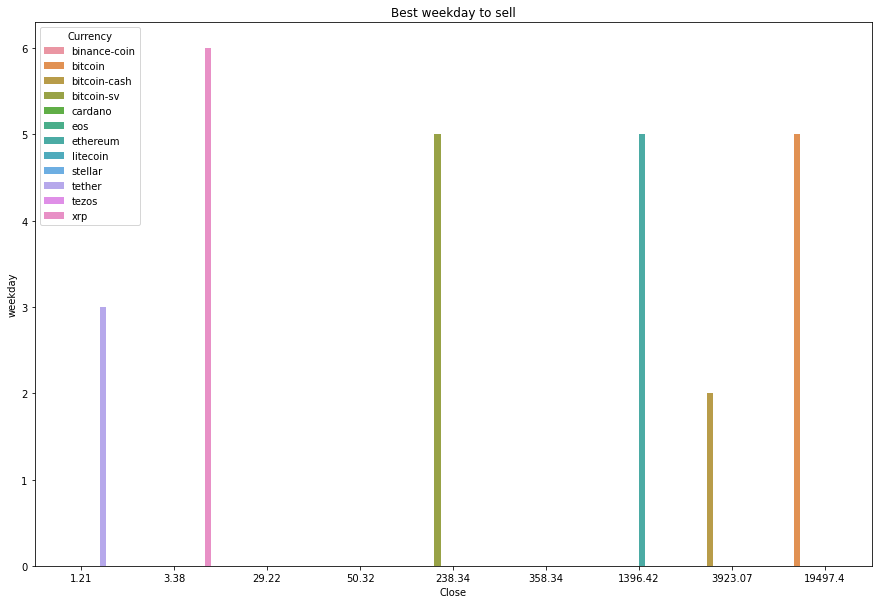

In [45]:
plt.figure(figsize=(15,10))
plt.title('Best weekday to sell')
sns.barplot(x = crypto_sell_df.Close, y = crypto_sell_df.weekday, hue = crypto_sell_df.Currency);

# Q5. The most widely transacted currency(by value) in 2019 April?

In [89]:
crypto_2019_df = crypto_df.drop(crypto_df[crypto_df['year']<2019].index)
crypto_2019_df = crypto_df.drop(crypto_df[crypto_df['month'] != 4].index)
crypto_2019_df =crypto_2019_df = crypto_2019_df.groupby('Currency')[['Volume']].sum().reset_index().max()
crypto_2019_df

Currency                                                  xrp
Volume      62,990,60269,287,15642,979,83150,161,50783,227...
dtype: object

#### As per the above, the most heavily traded currency in the month of april,2019 was XRP